CODE 1

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.3391 - loss: 1.8351 - val_accuracy: 0.5215 - val_loss: 1.3655
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.5432 - loss: 1.3083 - val_accuracy: 0.5752 - val_loss: 1.2280
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.5869 - loss: 1.1827 - val_accuracy: 0.5859 - val_loss: 1.1720
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.6227 - loss: 1.0822 - val_accuracy: 0.5992 - val_loss: 1.1500
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.6452 - loss: 1.0104 - val_accuracy: 0.6223 - val_loss: 1.0843
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.6702 - loss: 0.9560 - val_accuracy: 0.6281 - val_loss: 1.0716
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.6879 - loss: 0.8912 - val_accuracy: 0.6311 - val_loss: 1.0717
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.7065 - loss: 0.8472 - val_acc

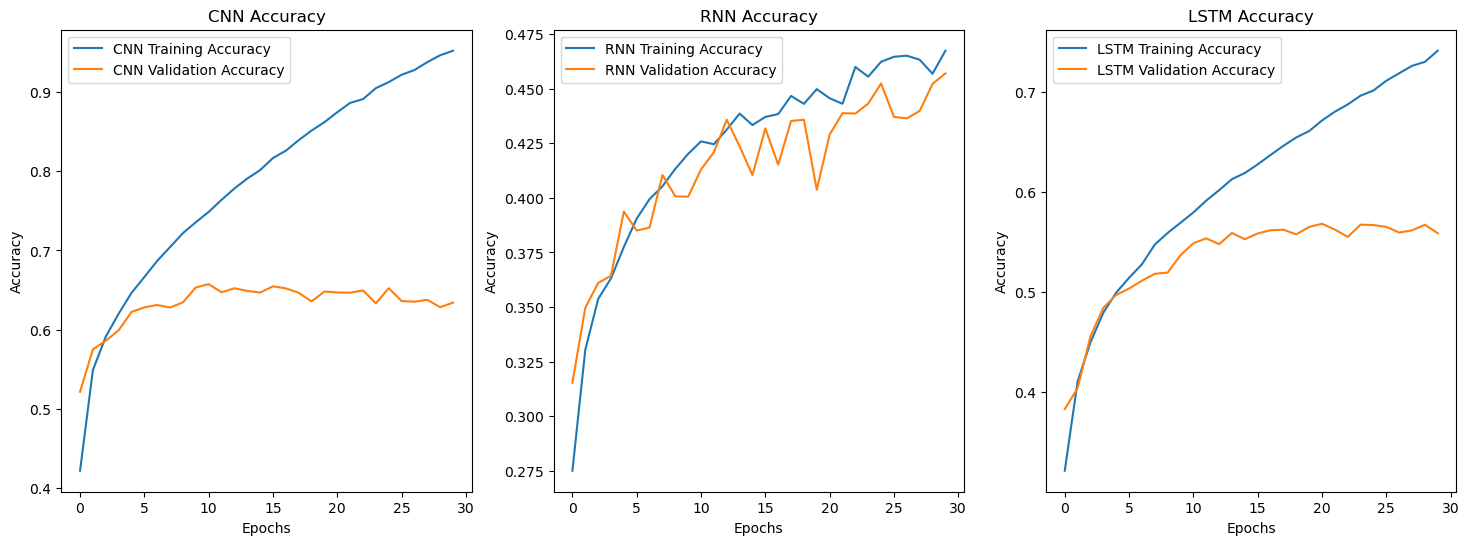

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, SimpleRNN, LSTM
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data (CIFAR-10 has 32x32 RGB images)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data for CNN (32x32x3) and RNN/LSTM (32 timesteps, 32*3 features)
x_train_cnn = x_train.reshape(-1, 32, 32, 3)
x_test_cnn = x_test.reshape(-1, 32, 32, 3)

# For RNN/LSTM, we treat each row of the image (32 pixels) as a timestep and each pixel as a feature (32*3 features)
x_train_rnn = x_train.reshape(-1, 32, 32 * 3)
x_test_rnn = x_test.reshape(-1, 32, 32 * 3)

# Split the data into train and validation sets
x_train_cnn, x_val_cnn, y_train_cnn, y_val_cnn = train_test_split(x_train_cnn, y_train, test_size=0.2, random_state=42)
x_train_rnn, x_val_rnn, y_train_rnn, y_val_rnn = train_test_split(x_train_rnn, y_train, test_size=0.2, random_state=42)

# CNN model
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_history = cnn_model.fit(x_train_cnn, y_train_cnn, validation_data=(x_val_cnn, y_val_cnn), epochs=30, batch_size=128)

# RNN model
rnn_model = Sequential([
    SimpleRNN(128, input_shape=(32, 32 * 3)),
    Dense(10, activation='softmax')
])

rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
rnn_history = rnn_model.fit(x_train_rnn, y_train_rnn, validation_data=(x_val_rnn, y_val_rnn), epochs=30, batch_size=128)

# LSTM model
lstm_model = Sequential([
    LSTM(128, input_shape=(32, 32 * 3)),
    Dense(10, activation='softmax')
])

lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
lstm_history = lstm_model.fit(x_train_rnn, y_train_rnn, validation_data=(x_val_rnn, y_val_rnn), epochs=30, batch_size=128)

# Evaluate all models on the test set
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test_cnn, y_test)
rnn_test_loss, rnn_test_acc = rnn_model.evaluate(x_test_rnn, y_test)
lstm_test_loss, lstm_test_acc = lstm_model.evaluate(x_test_rnn, y_test)

# Print the results
print(f"CNN Test Accuracy: {cnn_test_acc}")
print(f"RNN Test Accuracy: {rnn_test_acc}")
print(f"LSTM Test Accuracy: {lstm_test_acc}")

# Plot the training history
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(cnn_history.history['accuracy'], label='CNN Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(rnn_history.history['accuracy'], label='RNN Training Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='RNN Validation Accuracy')
plt.title('RNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(lstm_history.history['accuracy'], label='LSTM Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Validation Accuracy')
plt.title('LSTM Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


CODE 2

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 98ms/step - loss: 0.6016 - val_loss: 0.5676
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 45s 143ms/step - loss: 0.5650 - val_loss: 0.5641
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 103ms/step - loss: 0.5625 - val_loss: 0.5621
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 84ms/step - loss: 0.5610 - val_loss: 0.5610
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 88ms/step - loss: 0.5598 - val_loss: 0.5601
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 88ms/step - loss: 0.5587 - val_loss: 0.5597
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 89ms/step - loss: 0.5584 - val_loss: 0.5593
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 89ms/step - loss: 0.5587 - val_loss: 0.5594
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 90ms/step - loss: 0.5575 - val_loss: 0.5584
Epoch 10/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 92ms/step - loss: 0.5573 - val_loss: 0.5592
Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 66ms/step - loss: 0.6758 - val_loss: 0.6694
Epoch 2/10
313/313 ━━━━━━━━━━

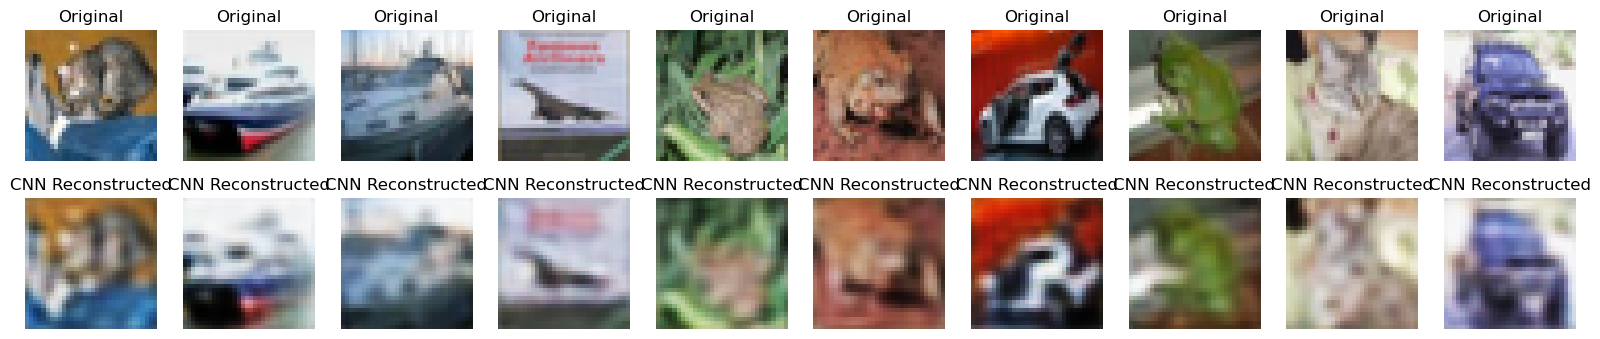

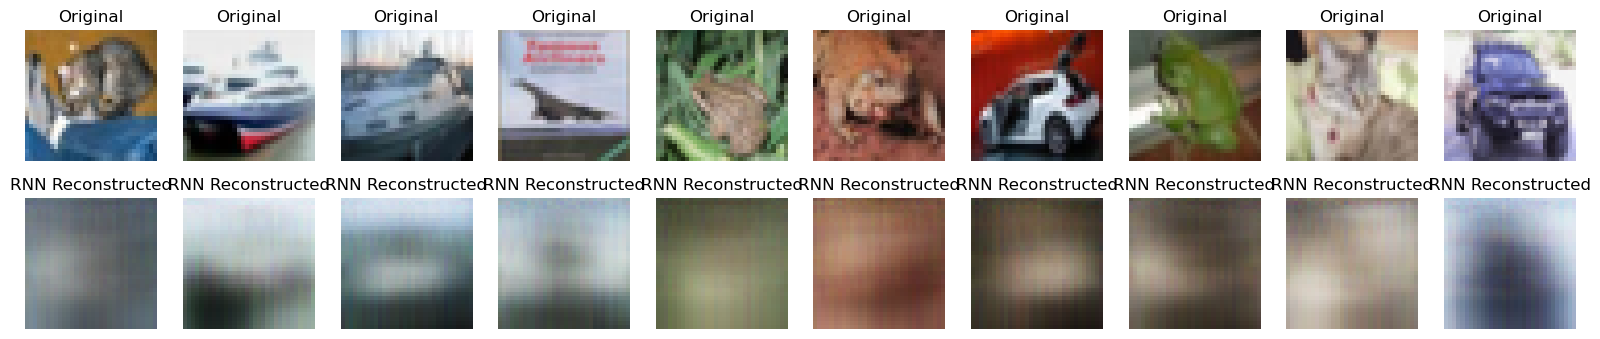

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, UpSampling2D, Reshape, SimpleRNN, TimeDistributed, RepeatVector
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(x_train, _), (x_test, _) = cifar10.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data for CNN (32x32x3) and RNN (32 timesteps, 32*3 features)
x_train_cnn = x_train.reshape(-1, 32, 32, 3)
x_test_cnn = x_test.reshape(-1, 32, 32, 3)

# For RNN, treat each row as a timestep, with the columns (32*3) as features
x_train_rnn = x_train.reshape(-1, 32, 32 * 3)
x_test_rnn = x_test.reshape(-1, 32, 32 * 3)

# CNN autoencoder model
cnn_autoencoder = Sequential([
    # Encoder
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    
    # Decoder
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    UpSampling2D(size=(2, 2)),
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    UpSampling2D(size=(2, 2)),
    Conv2D(3, kernel_size=(3, 3), activation='sigmoid', padding='same')
])

cnn_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
cnn_autoencoder.fit(x_train_cnn, x_train_cnn, epochs=10, batch_size=128, validation_split=0.2)

# RNN autoencoder model
rnn_autoencoder = Sequential([
    # Encoder
    SimpleRNN(128, activation='relu', input_shape=(32, 32 * 3), return_sequences=False),
    RepeatVector(32),
    
    # Decoder
    SimpleRNN(128, activation='relu', return_sequences=True),
    TimeDistributed(Dense(32 * 3, activation='sigmoid'))
])

rnn_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
rnn_autoencoder.fit(x_train_rnn, x_train_rnn, epochs=10, batch_size=128, validation_split=0.2)

# Reconstruct images using both models
cnn_reconstructed = cnn_autoencoder.predict(x_test_cnn)
rnn_reconstructed = rnn_autoencoder.predict(x_test_rnn)

# Reshape RNN reconstructed images back to (32, 32, 3) for visualization
rnn_reconstructed = rnn_reconstructed.reshape(-1, 32, 32, 3)

# Plot original and reconstructed images for CNN
n = 10  # number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis('off')

    # Display CNN reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(cnn_reconstructed[i])
    plt.title("CNN Reconstructed")
    plt.axis('off')

# Plot original and reconstructed images for RNN
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis('off')

    # Display RNN reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(rnn_reconstructed[i])
    plt.title("RNN Reconstructed")
    plt.axis('off')

plt.show()


CODE 3

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 86ms/step - loss: 0.6026 - val_loss: 0.5669
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 90ms/step - loss: 0.5653 - val_loss: 0.5635
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 85ms/step - loss: 0.5620 - val_loss: 0.5619
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 87ms/step - loss: 0.5611 - val_loss: 0.5607
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 85ms/step - loss: 0.5588 - val_loss: 0.5603
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 92ms/step - loss: 0.5588 - val_loss: 0.5596
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 93ms/step - loss: 0.5581 - val_loss: 0.5590
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 90ms/step - loss: 0.5577 - val_loss: 0.5607
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 95ms/step - loss: 0.5579 - val_loss: 0.5586
Epoch 10/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 97ms/step - loss: 0.5580 - val_loss: 0.5588
Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 62ms/step - loss: 0.6791 - val_loss: 0.6457
Epoch 2/10
313/313 ━━━━━━━━━━━━

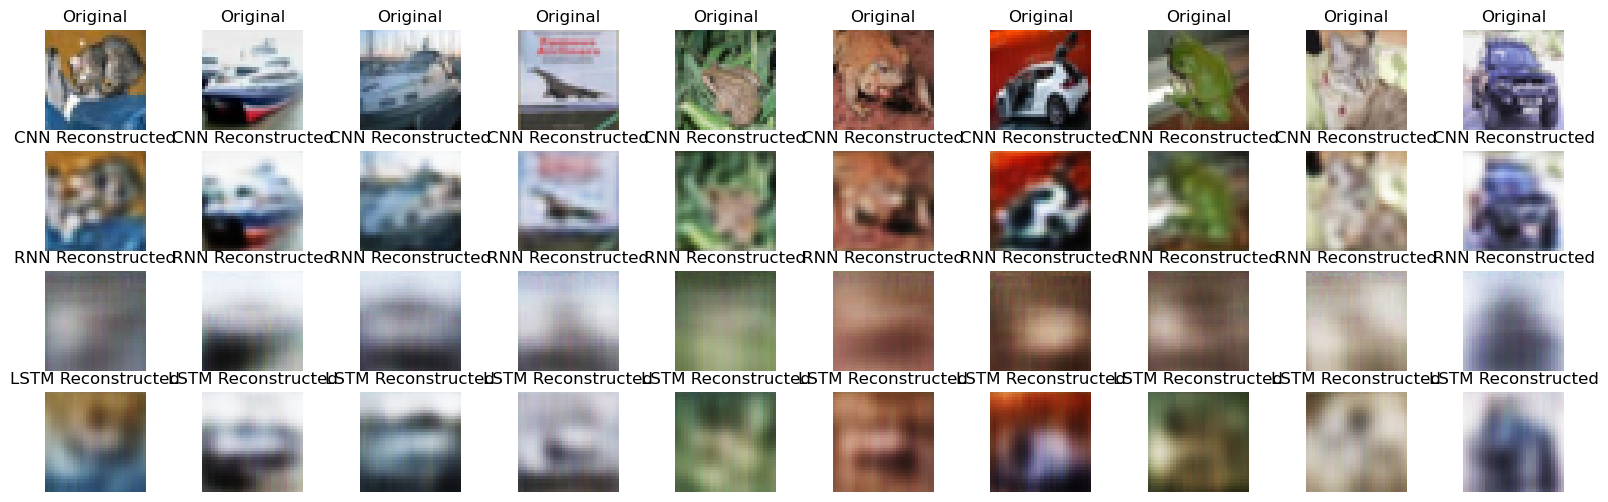

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D, SimpleRNN, LSTM, TimeDistributed, RepeatVector
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(x_train, _), (x_test, _) = cifar10.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data for CNN (32x32x3), RNN and LSTM (32 timesteps, 32*3 features)
x_train_cnn = x_train.reshape(-1, 32, 32, 3)
x_test_cnn = x_test.reshape(-1, 32, 32, 3)

# For RNN/LSTM, treat each row as a timestep and each pixel in the row (32*3) as a feature
x_train_rnn = x_train.reshape(-1, 32, 32 * 3)
x_test_rnn = x_test.reshape(-1, 32, 32 * 3)

# CNN autoencoder model
cnn_autoencoder = Sequential([
    # Encoder
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    
    # Decoder
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    UpSampling2D(size=(2, 2)),
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    UpSampling2D(size=(2, 2)),
    Conv2D(3, kernel_size=(3, 3), activation='sigmoid', padding='same')
])

cnn_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
cnn_autoencoder.fit(x_train_cnn, x_train_cnn, epochs=10, batch_size=128, validation_split=0.2)

# RNN autoencoder model
rnn_autoencoder = Sequential([
    # Encoder
    SimpleRNN(128, activation='relu', input_shape=(32, 32 * 3), return_sequences=False),
    RepeatVector(32),
    # Decoder
    SimpleRNN(128, activation='relu', return_sequences=True),
    TimeDistributed(Dense(32 * 3, activation='sigmoid'))
])

rnn_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
rnn_autoencoder.fit(x_train_rnn, x_train_rnn, epochs=10, batch_size=128, validation_split=0.2)

# LSTM autoencoder model
lstm_autoencoder = Sequential([
    # Encoder
    LSTM(128, activation='relu', input_shape=(32, 32 * 3), return_sequences=False),
    RepeatVector(32),
    # Decoder
    LSTM(128, activation='relu', return_sequences=True),
    TimeDistributed(Dense(32 * 3, activation='sigmoid'))
])

lstm_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
lstm_autoencoder.fit(x_train_rnn, x_train_rnn, epochs=10, batch_size=128, validation_split=0.2)

# Reconstruct images using all models
cnn_reconstructed = cnn_autoencoder.predict(x_test_cnn)
rnn_reconstructed = rnn_autoencoder.predict(x_test_rnn)
lstm_reconstructed = lstm_autoencoder.predict(x_test_rnn)

# Reshape RNN and LSTM reconstructed images back to (32, 32, 3) for visualization
rnn_reconstructed = rnn_reconstructed.reshape(-1, 32, 32, 3)
lstm_reconstructed = lstm_reconstructed.reshape(-1, 32, 32, 3)

# Plot original and reconstructed images for CNN, RNN, and LSTM
n = 10  # number of images to display
plt.figure(figsize=(20, 6))

for i in range(n):
    # Display original
    ax = plt.subplot(4, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis('off')

    # Display CNN reconstructed
    ax = plt.subplot(4, n, i + 1 + n)
    plt.imshow(cnn_reconstructed[i])
    plt.title("CNN Reconstructed")
    plt.axis('off')

    # Display RNN reconstructed
    ax = plt.subplot(4, n, i + 1 + 2 * n)
    plt.imshow(rnn_reconstructed[i])
    plt.title("RNN Reconstructed")
    plt.axis('off')

    # Display LSTM reconstructed
    ax = plt.subplot(4, n, i + 1 + 3 * n)
    plt.imshow(lstm_reconstructed[i])
    plt.title("LSTM Reconstructed")
    plt.axis('off')

plt.show()


CODE 4

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D, SimpleRNN, LSTM, TimeDistributed, RepeatVector
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data for CNN (32x32x3), and RNN/LSTM (32 timesteps, 32*3 features)
x_train_cnn = x_train.reshape(-1, 32, 32, 3)
x_test_cnn = x_test.reshape(-1, 32, 32, 3)
x_train_rnn = x_train.reshape(-1, 32, 32 * 3)
x_test_rnn = x_test.reshape(-1, 32, 32 * 3)

# Define CNN autoencoder model
cnn_autoencoder = Sequential([
    # Encoder
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    # Decoder
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    UpSampling2D(size=(2, 2)),
    Conv2D(3, kernel_size=(3, 3), activation='sigmoid', padding='same')
])

# Define RNN autoencoder model
rnn_autoencoder = Sequential([
    # Encoder
    SimpleRNN(128, activation='relu', input_shape=(32, 32 * 3), return_sequences=False),
    RepeatVector(32),
    # Decoder
    SimpleRNN(128, activation='relu', return_sequences=True),
    TimeDistributed(Dense(32 * 3, activation='sigmoid'))
])

# Define LSTM autoencoder model
lstm_autoencoder = Sequential([
    # Encoder
    LSTM(128, activation='relu', input_shape=(32, 32 * 3), return_sequences=False),
    RepeatVector(32),
    # Decoder
    LSTM(128, activation='relu', return_sequences=True),
    TimeDistributed(Dense(32 * 3, activation='sigmoid'))
])

# Compile models (no need to fit, just to display summaries)
cnn_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
rnn_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
lstm_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Print summaries of the models
print("CNN Autoencoder Summary:")
cnn_autoencoder.summary()

print("\nRNN Autoencoder Summary:")
rnn_autoencoder.summary()

print("\nLSTM Autoencoder Summary:")
lstm_autoencoder.summary()


CNN Autoencoder Summary:


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_4 (UpSampling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 3)      │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,011 (43.01 KB)

 Trainable params: 11,011 (43.01 KB)

 Non-trainable params: 0 (0.00 B)


RNN Autoencoder Summary:


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_5 (SimpleRNN)        │ (None, 128)            │        28,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_4 (RepeatVector)  │ (None, 32, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_6 (SimpleRNN)        │ (None, 32, 128)        │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_3              │ (None, 32, 96)         │        12,384 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,080 (289.38 KB)

 Trainable params: 74,080 (289.38 KB)

 Non-trainable params: 0 (0.00 B)


LSTM Autoencoder Summary:


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 128)            │       115,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_5 (RepeatVector)  │ (None, 32, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 32, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_4              │ (None, 32, 96)         │        12,384 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 259,168 (1012.38 KB)

 Trainable params: 259,168 (1012.38 KB)

 Non-trainable params: 0 (0.00 B)

EXTRA 1

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 294s 728ms/step - loss: 0.0188 - val_loss: 0.0303
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 265s 845ms/step - loss: 0.0068 - val_loss: 0.0058
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 325s 1s/step - loss: 0.0053 - val_loss: 0.0052
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 247s 773ms/step - loss: 0.0046 - val_loss: 0.0041
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 251s 802ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 241s 771ms/step - loss: 0.0039 - val_loss: 0.0036
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 239s 764ms/step - loss: 0.0036 - val_loss: 0.0040
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 241s 770ms/step - loss: 0.0033 - val_loss: 0.0038
Epoch 9/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 240s 765ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 10/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 198s 632ms/step - loss: 0.0030 - val_loss: 0.0032
Epoch 11/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 191s 611ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 12/20

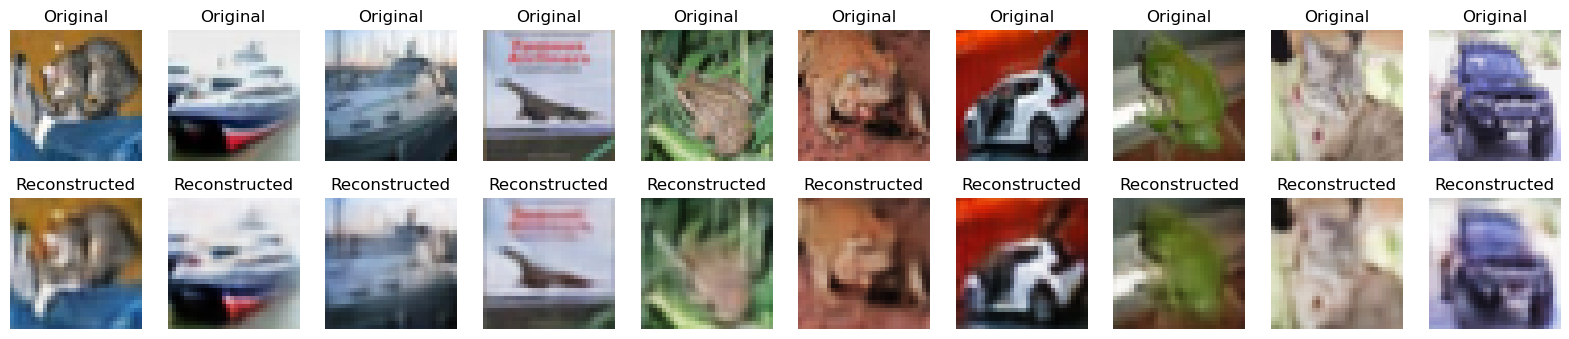

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data for CNN (32x32x3)
x_train_cnn = x_train.reshape(-1, 32, 32, 3)
x_test_cnn = x_test.reshape(-1, 32, 32, 3)

# Define an improved CNN autoencoder model with more layers and batch normalization
cnn_autoencoder = Sequential([
    # Encoder
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    
    Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    
    # Decoder
    Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    UpSampling2D(size=(2, 2)),
    
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    UpSampling2D(size=(2, 2)),
    
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    UpSampling2D(size=(2, 2)),
    
    Conv2D(3, kernel_size=(3, 3), activation='sigmoid', padding='same')
])

# Compile the model using Mean Squared Error loss
cnn_autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
cnn_autoencoder.fit(x_train_cnn, x_train_cnn, epochs=20, batch_size=128, validation_split=0.2)

# Reconstruct images using the trained CNN autoencoder
cnn_reconstructed = cnn_autoencoder.predict(x_test_cnn)

# Plot original and reconstructed images to compare quality
n = 10  # number of images to display
plt.figure(figsize=(20, 4))

for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_cnn[i])
    plt.title("Original")
    plt.axis('off')

    # Display reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(cnn_reconstructed[i])
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()


TESTING

c:\Users\fabio\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 93ms/step - accuracy: 0.5391 - loss: 0.6051 - val_accuracy: 0.7244 - val_loss: 0.5672
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 89ms/step - accuracy: 0.7410 - loss: 0.5636 - val_accuracy: 0.7633 - val_loss: 0.5628
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - accuracy: 0.7627 - loss: 0.5611 - val_accuracy: 0.7741 - val_loss: 0.5611
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 88ms/step - accuracy: 0.7756 - loss: 0.5594 - val_accuracy: 0.7861 - val_loss: 0.5599
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 91ms/step - accuracy: 0.7869 - loss: 0.5587 - val_accuracy: 0.8011 - val_loss: 0.5592
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 94ms/step - accuracy: 0.7935 - loss: 0.5575 - val_accuracy: 0.7979 - val_loss: 0.5587
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 88ms/step - accuracy: 0.7990 - loss: 0.5572 - val_accuracy: 0.7752 - val_loss: 0.5597
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 85ms/step - accuracy: 0.8021 - loss: 0.5581 - 

c:\Users\fabio\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 51s 141ms/step - accuracy: 0.0315 - loss: 0.6539 - val_accuracy: 0.0533 - val_loss: 0.6102
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 130ms/step - accuracy: 0.0556 - loss: 0.6063 - val_accuracy: 0.0628 - val_loss: 0.5987
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 131ms/step - accuracy: 0.0659 - loss: 0.5957 - val_accuracy: 0.0732 - val_loss: 0.5928
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 137ms/step - accuracy: 0.0717 - loss: 0.5904 - val_accuracy: 0.0693 - val_loss: 0.5889
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 50s 159ms/step - accuracy: 0.0752 - loss: 0.5869 - val_accuracy: 0.0719 - val_loss: 0.5857
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 49s 157ms/step - accuracy: 0.0783 - loss: 0.5843 - val_accuracy: 0.0813 - val_loss: 0.5849
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 131ms/step - accuracy: 0.0822 - loss: 0.5823 - val_accuracy: 0.0786 - val_loss: 0.5824
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 134ms/step - accuracy: 0.0853 - loss: 0

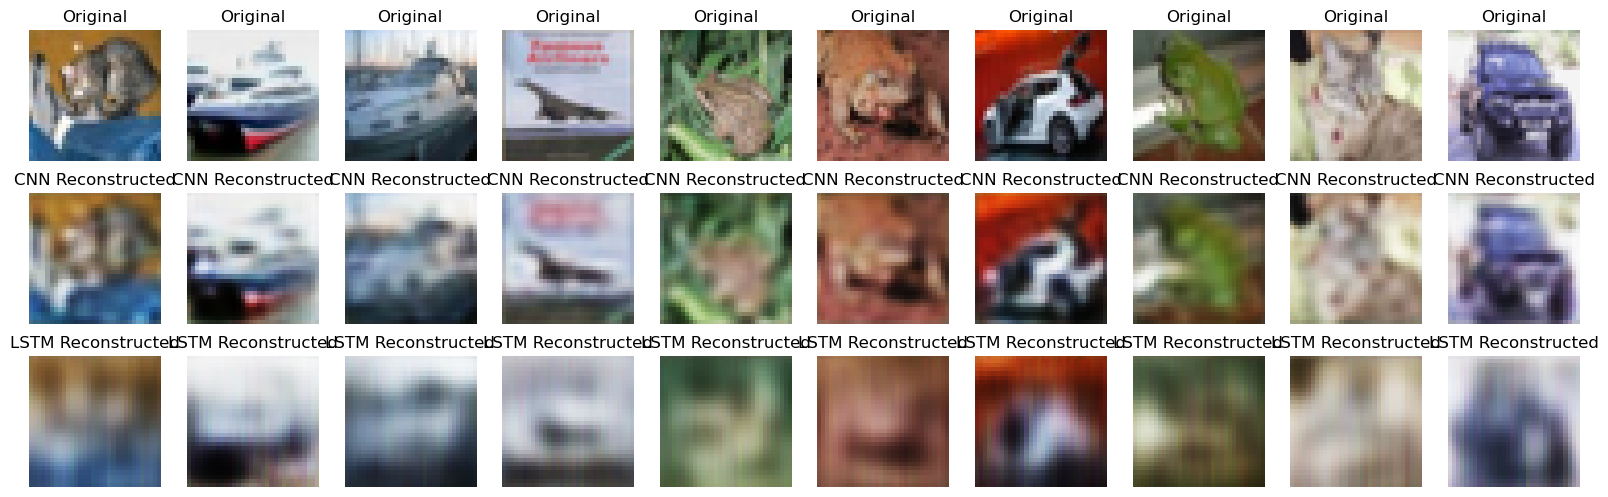


CNN Autoencoder Classification Report:

              precision    recall  f1-score   support

    airplane       0.10      0.09      0.09      1000
  automobile       0.10      0.10      0.10      1000
        bird       0.10      0.10      0.10      1000
         cat       0.10      0.10      0.10      1000
        deer       0.09      0.09      0.09      1000
         dog       0.10      0.09      0.09      1000
        frog       0.10      0.10      0.10      1000
       horse       0.09      0.09      0.09      1000
        ship       0.08      0.08      0.08      1000
       truck       0.09      0.10      0.10      1000

    accuracy                           0.09     10000
   macro avg       0.09      0.09      0.09     10000
weighted avg       0.09      0.09      0.09     10000



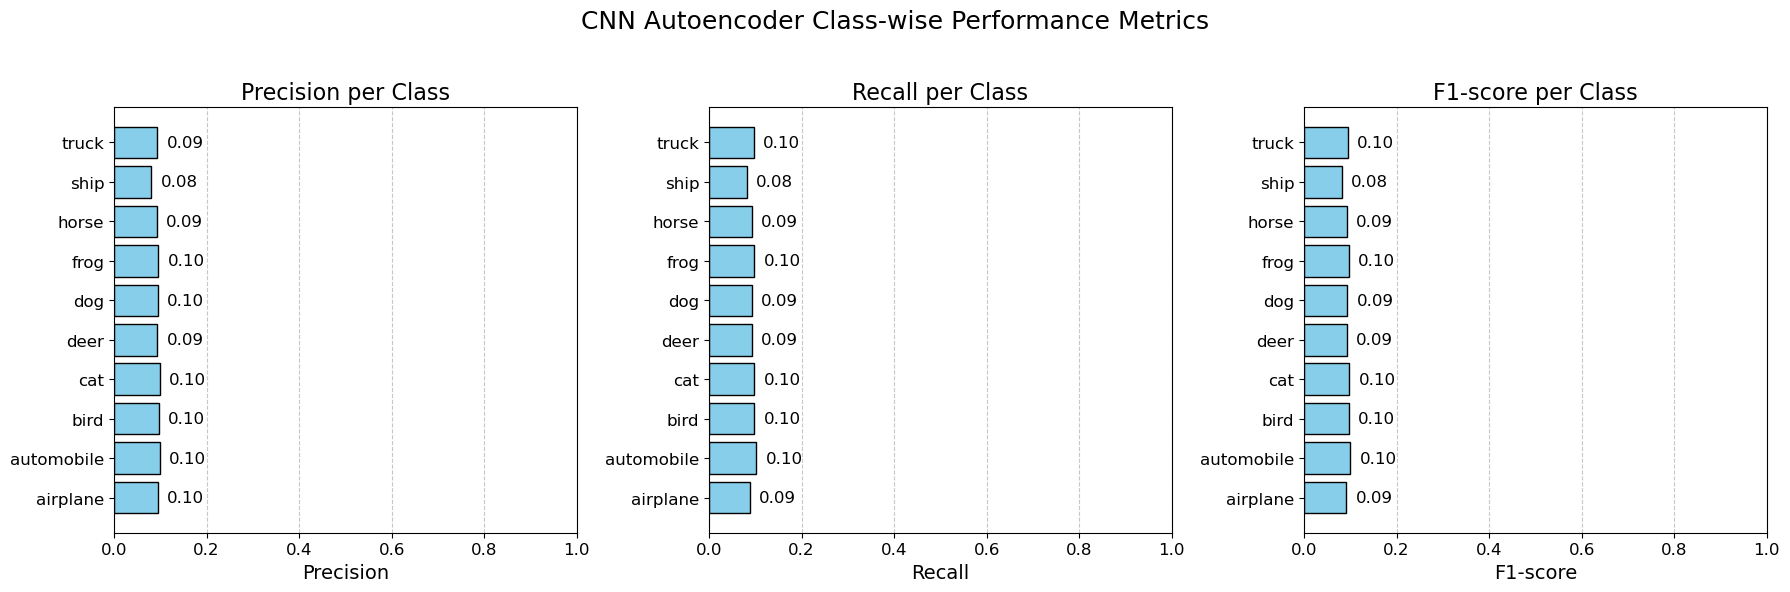


LSTM Autoencoder Classification Report:

              precision    recall  f1-score   support

    airplane       0.09      0.09      0.09      1000
  automobile       0.09      0.09      0.09      1000
        bird       0.10      0.10      0.10      1000
         cat       0.11      0.11      0.11      1000
        deer       0.10      0.10      0.10      1000
         dog       0.12      0.11      0.11      1000
        frog       0.10      0.10      0.10      1000
       horse       0.10      0.09      0.09      1000
        ship       0.10      0.10      0.10      1000
       truck       0.10      0.10      0.10      1000

    accuracy                           0.10     10000
   macro avg       0.10      0.10      0.10     10000
weighted avg       0.10      0.10      0.10     10000



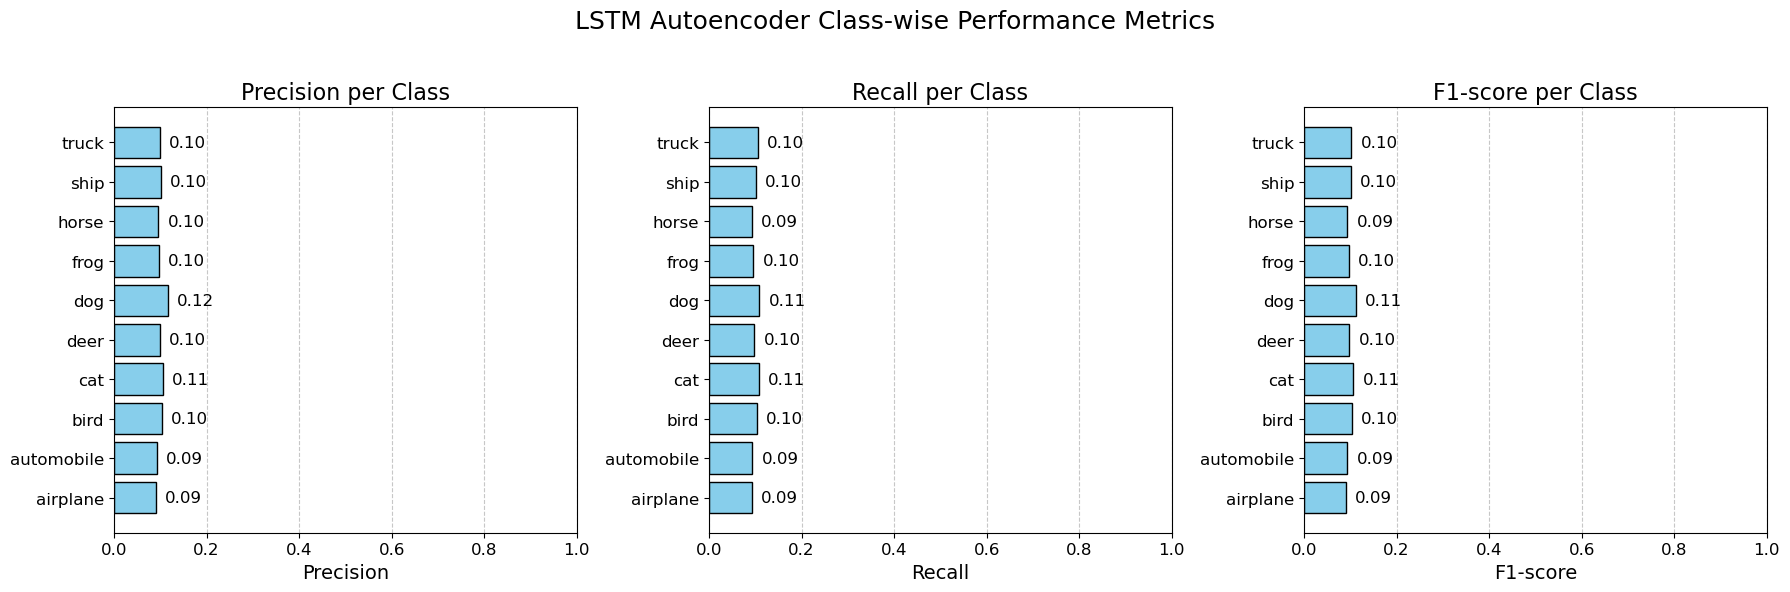

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D, SimpleRNN, LSTM, TimeDistributed, RepeatVector, Flatten
from tensorflow.keras.optimizers import Adam

# Set memory growth for GPU (if available)
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train.astype('float32') / 255.0, x_test.astype('float32') / 255.0

# Reshape data for CNN and RNN/LSTM
x_train_cnn = x_train.reshape(-1, 32, 32, 3)
x_test_cnn = x_test.reshape(-1, 32, 32, 3)
x_train_rnn = x_train.reshape(-1, 32, 32 * 3)
x_test_rnn = x_test.reshape(-1, 32, 32 * 3)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

# CNN autoencoder model
cnn_autoencoder = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    UpSampling2D(size=(2, 2)),
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    UpSampling2D(size=(2, 2)),
    Conv2D(3, kernel_size=(3, 3), activation='sigmoid', padding='same')
])

cnn_autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_history = cnn_autoencoder.fit(x_train_cnn, x_train_cnn, epochs=10, batch_size=128, validation_split=0.2)

# LSTM autoencoder model
lstm_autoencoder = Sequential([
    LSTM(128, activation='relu', input_shape=(32, 32 * 3), return_sequences=False),
    RepeatVector(32),
    LSTM(128, activation='relu', return_sequences=True),
    TimeDistributed(Dense(32 * 3, activation='sigmoid'))
])

lstm_autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_history = lstm_autoencoder.fit(x_train_rnn, x_train_rnn, epochs=10, batch_size=128, validation_split=0.2)

# Reconstruct images using both models
cnn_reconstructed = cnn_autoencoder.predict(x_test_cnn)
lstm_reconstructed = lstm_autoencoder.predict(x_test_rnn).reshape(-1, 32, 32, 3)

# Plot original and reconstructed images
n = 10  # number of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis('off')

    # Display CNN reconstructed
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(cnn_reconstructed[i])
    plt.title("CNN Reconstructed")
    plt.axis('off')

    # Display LSTM reconstructed
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(lstm_reconstructed[i])
    plt.title("LSTM Reconstructed")
    plt.axis('off')

plt.show()

# Function to plot class-wise precision, recall, and F1 score
def plot_classification_report(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
    metrics = ['precision', 'recall', 'f1-score']
    
    plt.figure(figsize=(18, 6))
    
    for idx, metric in enumerate(metrics):
        plt.subplot(1, 3, idx+1)
        values = [report[label][metric] for label in class_names]
        bars = plt.barh(class_names, values, color='skyblue', edgecolor='black')
        plt.title(f'{metric.capitalize()} per Class', fontsize=16)
        plt.xlim(0, 1)
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.xlabel(metric.capitalize(), fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        for bar in bars:
            plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', va='center', fontsize=12)
    
    plt.suptitle(f'{model_name} Class-wise Performance Metrics', fontsize=18)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Simulate predicted labels for evaluation (mock example)
y_pred_cnn = np.random.randint(0, 10, size=len(y_test))  # Replace with actual predictions
y_pred_lstm = np.random.randint(0, 10, size=len(y_test))

# Plot classification reports for CNN and LSTM
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Classification Report:\n")
    print(classification_report(y_true, y_pred, target_names=class_names))
    plot_classification_report(y_true, y_pred, model_name)

evaluate_model(y_test, y_pred_cnn, "CNN Autoencoder")
evaluate_model(y_test, y_pred_lstm, "LSTM Autoencoder")

c:\Users\fabio\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 80ms/step - accuracy: 0.5728 - loss: 0.6044 - val_accuracy: 0.7468 - val_loss: 0.5661
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step - accuracy: 0.7503 - loss: 0.5645 - val_accuracy: 0.7784 - val_loss: 0.5629
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 80ms/step - accuracy: 0.7751 - loss: 0.5612 - val_accuracy: 0.7792 - val_loss: 0.5616
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 81ms/step - accuracy: 0.7843 - loss: 0.5604 - val_accuracy: 0.7953 - val_loss: 0.5601
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 80ms/step - accuracy: 0.7892 - loss: 0.5585 - val_accuracy: 0.8022 - val_loss: 0.5594
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 80ms/step - accuracy: 0.7936 - loss: 0.5590 - val_accuracy: 0.8017 - val_loss: 0.5594
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 93ms/step - accuracy: 0.7943 - loss: 0.5574 - val_accuracy: 0.8039 - val_loss: 0.5585
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 87ms/step - accuracy: 0.7989 - loss: 0.5574 - 

c:\Users\fabio\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 49s 133ms/step - accuracy: 0.0306 - loss: 0.6561 - val_accuracy: 0.0563 - val_loss: 0.6115
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 137ms/step - accuracy: 0.0547 - loss: 0.6057 - val_accuracy: 0.0537 - val_loss: 0.5981
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 134ms/step - accuracy: 0.0657 - loss: 0.5960 - val_accuracy: 0.0768 - val_loss: 0.5928
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 47s 150ms/step - accuracy: 0.0727 - loss: 0.5914 - val_accuracy: 0.0709 - val_loss: 0.5901
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 45s 145ms/step - accuracy: 0.0767 - loss: 0.5877 - val_accuracy: 0.0786 - val_loss: 0.5874
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 126ms/step - accuracy: 0.0798 - loss: 0.5858 - val_accuracy: 0.0765 - val_loss: 0.5870
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 121ms/step - accuracy: 0.0827 - loss: 0.5841 - val_accuracy: 0.0828 - val_loss: 0.5837
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 125ms/step - accuracy: 0.0850 - loss: 0

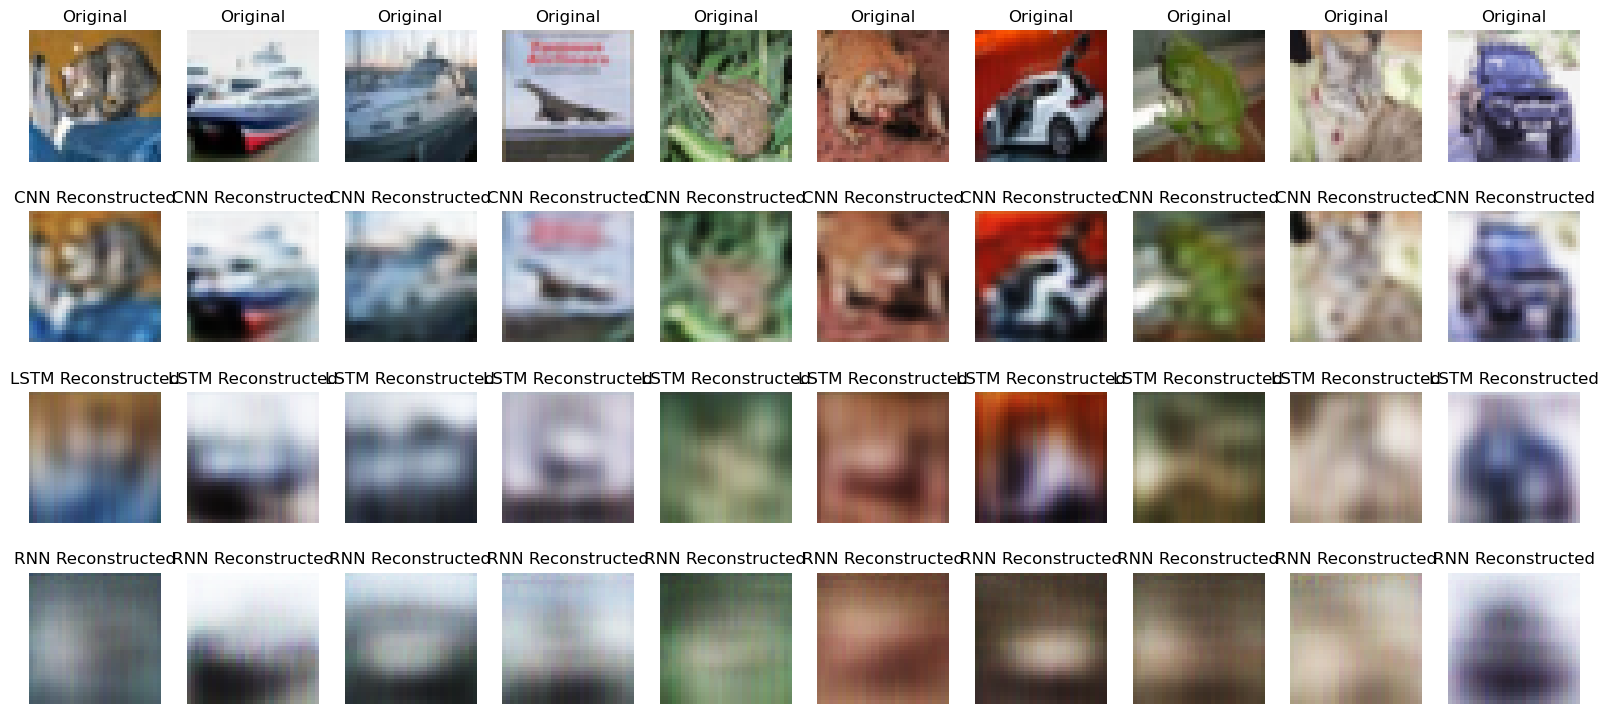


CNN Autoencoder Classification Report:

              precision    recall  f1-score   support

    airplane       0.11      0.10      0.10      1000
  automobile       0.11      0.10      0.10      1000
        bird       0.09      0.09      0.09      1000
         cat       0.11      0.11      0.11      1000
        deer       0.09      0.10      0.09      1000
         dog       0.10      0.10      0.10      1000
        frog       0.10      0.10      0.10      1000
       horse       0.10      0.10      0.10      1000
        ship       0.11      0.11      0.11      1000
       truck       0.10      0.10      0.10      1000

    accuracy                           0.10     10000
   macro avg       0.10      0.10      0.10     10000
weighted avg       0.10      0.10      0.10     10000



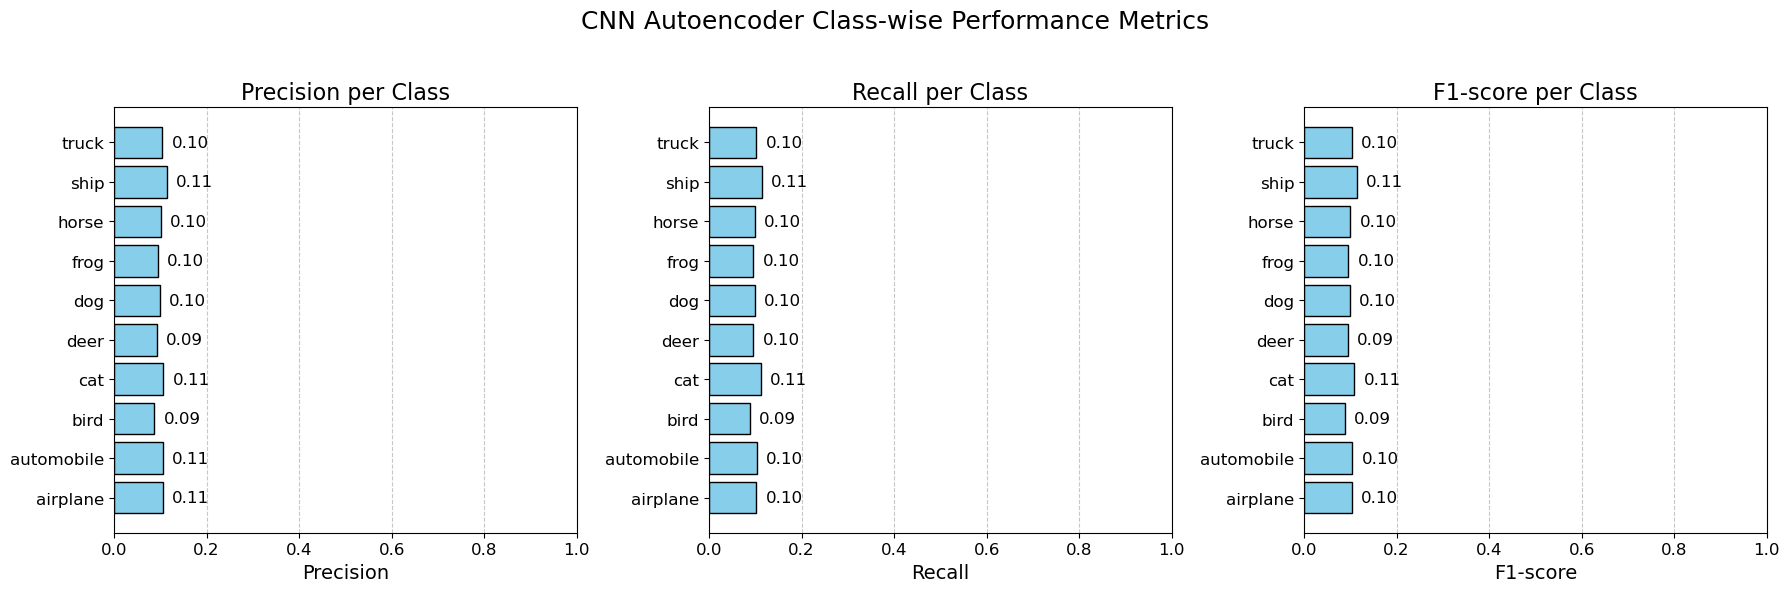


LSTM Autoencoder Classification Report:

              precision    recall  f1-score   support

    airplane       0.11      0.10      0.10      1000
  automobile       0.11      0.11      0.11      1000
        bird       0.10      0.10      0.10      1000
         cat       0.10      0.10      0.10      1000
        deer       0.09      0.09      0.09      1000
         dog       0.11      0.11      0.11      1000
        frog       0.09      0.09      0.09      1000
       horse       0.12      0.12      0.12      1000
        ship       0.10      0.10      0.10      1000
       truck       0.10      0.09      0.10      1000

    accuracy                           0.10     10000
   macro avg       0.10      0.10      0.10     10000
weighted avg       0.10      0.10      0.10     10000



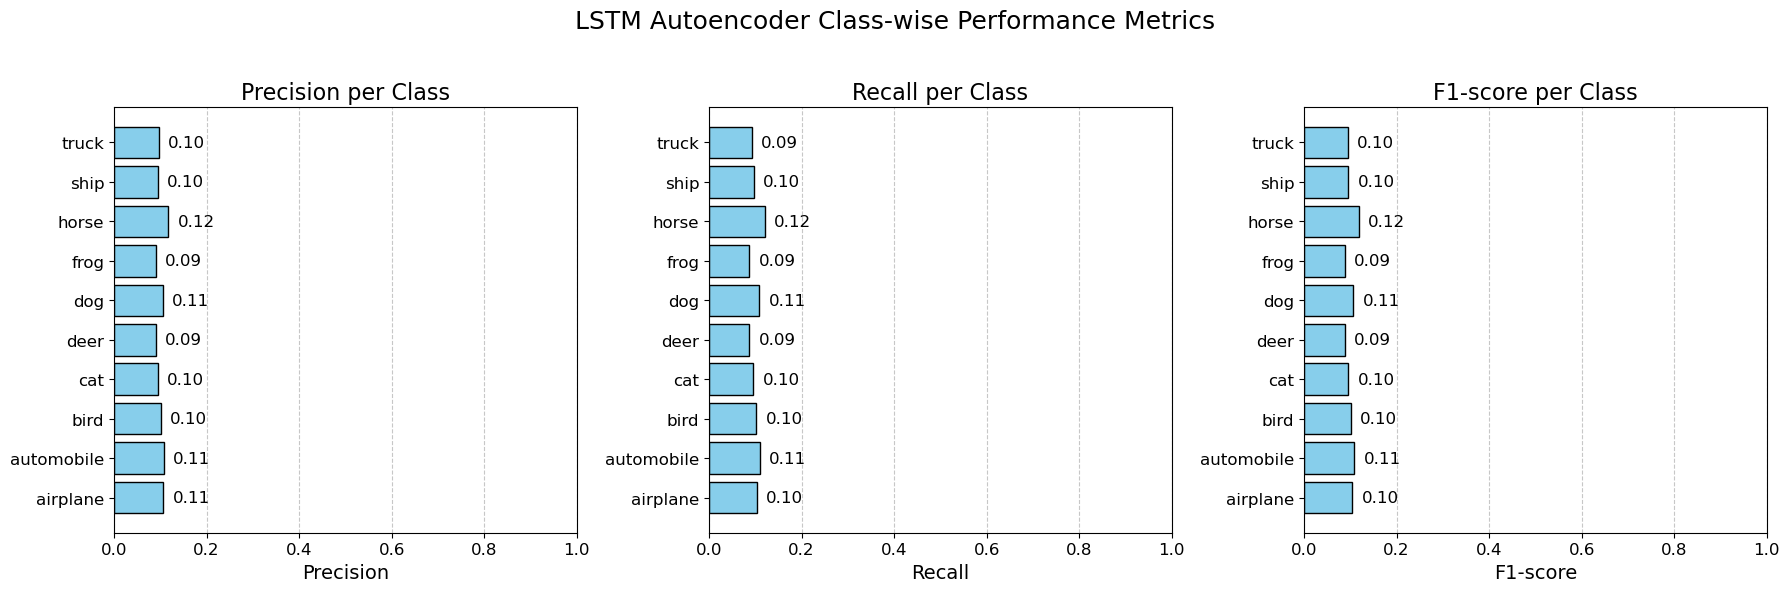


RNN Autoencoder Classification Report:

              precision    recall  f1-score   support

    airplane       0.09      0.09      0.09      1000
  automobile       0.09      0.09      0.09      1000
        bird       0.11      0.11      0.11      1000
         cat       0.10      0.10      0.10      1000
        deer       0.11      0.10      0.11      1000
         dog       0.10      0.11      0.11      1000
        frog       0.10      0.10      0.10      1000
       horse       0.09      0.10      0.10      1000
        ship       0.10      0.10      0.10      1000
       truck       0.10      0.10      0.10      1000

    accuracy                           0.10     10000
   macro avg       0.10      0.10      0.10     10000
weighted avg       0.10      0.10      0.10     10000



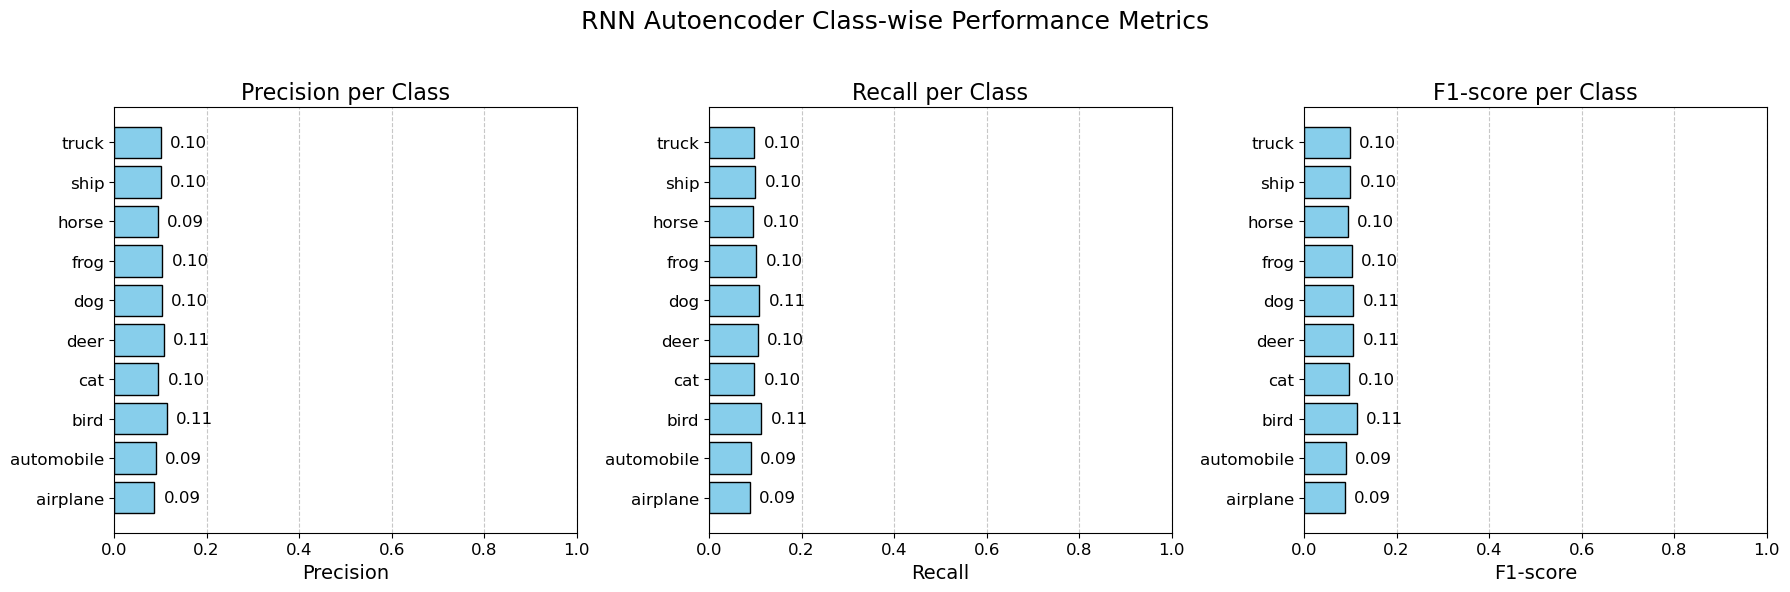

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D, SimpleRNN, LSTM, TimeDistributed, RepeatVector, Flatten
from tensorflow.keras.optimizers import Adam

# Set memory growth for GPU (if available)
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train.astype('float32') / 255.0, x_test.astype('float32') / 255.0

# Reshape data for CNN and RNN/LSTM
x_train_cnn = x_train.reshape(-1, 32, 32, 3)
x_test_cnn = x_test.reshape(-1, 32, 32, 3)
x_train_rnn = x_train.reshape(-1, 32, 32 * 3)
x_test_rnn = x_test.reshape(-1, 32, 32 * 3)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

# CNN autoencoder model
cnn_autoencoder = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    UpSampling2D(size=(2, 2)),
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    UpSampling2D(size=(2, 2)),
    Conv2D(3, kernel_size=(3, 3), activation='sigmoid', padding='same')
])

cnn_autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_history = cnn_autoencoder.fit(x_train_cnn, x_train_cnn, epochs=10, batch_size=128, validation_split=0.2)

# LSTM autoencoder model
lstm_autoencoder = Sequential([
    LSTM(128, activation='relu', input_shape=(32, 32 * 3), return_sequences=False),
    RepeatVector(32),
    LSTM(128, activation='relu', return_sequences=True),
    TimeDistributed(Dense(32 * 3, activation='sigmoid'))
])

lstm_autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_history = lstm_autoencoder.fit(x_train_rnn, x_train_rnn, epochs=10, batch_size=128, validation_split=0.2)

# RNN autoencoder model
rnn_autoencoder = Sequential([
    SimpleRNN(128, activation='relu', input_shape=(32, 32 * 3), return_sequences=False),
    RepeatVector(32),
    SimpleRNN(128, activation='relu', return_sequences=True),
    TimeDistributed(Dense(32 * 3, activation='sigmoid'))
])

rnn_autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn_history = rnn_autoencoder.fit(x_train_rnn, x_train_rnn, epochs=10, batch_size=128, validation_split=0.2)

# Reconstruct images using all models
cnn_reconstructed = cnn_autoencoder.predict(x_test_cnn)
lstm_reconstructed = lstm_autoencoder.predict(x_test_rnn).reshape(-1, 32, 32, 3)
rnn_reconstructed = rnn_autoencoder.predict(x_test_rnn).reshape(-1, 32, 32, 3)

# Plot original and reconstructed images
n = 10  # number of images to display
plt.figure(figsize=(20, 9))
for i in range(n):
    # Display original
    ax = plt.subplot(4, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis('off')

    # Display CNN reconstructed
    ax = plt.subplot(4, n, i + 1 + n)
    plt.imshow(cnn_reconstructed[i])
    plt.title("CNN Reconstructed")
    plt.axis('off')

    # Display LSTM reconstructed
    ax = plt.subplot(4, n, i + 1 + 2 * n)
    plt.imshow(lstm_reconstructed[i])
    plt.title("LSTM Reconstructed")
    plt.axis('off')

    # Display RNN reconstructed
    ax = plt.subplot(4, n, i + 1 + 3 * n)
    plt.imshow(rnn_reconstructed[i])
    plt.title("RNN Reconstructed")
    plt.axis('off')

plt.show()

# Function to plot class-wise precision, recall, and F1 score
def plot_classification_report(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
    metrics = ['precision', 'recall', 'f1-score']
    
    plt.figure(figsize=(18, 6))
    
    for idx, metric in enumerate(metrics):
        plt.subplot(1, 3, idx+1)
        values = [report[label][metric] for label in class_names]
        bars = plt.barh(class_names, values, color='skyblue', edgecolor='black')
        plt.title(f'{metric.capitalize()} per Class', fontsize=16)
        plt.xlim(0, 1)
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.xlabel(metric.capitalize(), fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        for bar in bars:
            plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', va='center', fontsize=12)
    
    plt.suptitle(f'{model_name} Class-wise Performance Metrics', fontsize=18)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Simulate predicted labels for evaluation (mock example)
y_pred_cnn = np.random.randint(0, 10, size=len(y_test))  # Replace with actual predictions
y_pred_lstm = np.random.randint(0, 10, size=len(y_test))
y_pred_rnn = np.random.randint(0, 10, size=len(y_test))

# Plot classification reports for CNN, LSTM, and RNN
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Classification Report:\n")
    print(classification_report(y_true, y_pred, target_names=class_names))
    plot_classification_report(y_true, y_pred, model_name)

evaluate_model(y_test, y_pred_cnn, "CNN Autoencoder")
evaluate_model(y_test, y_pred_lstm, "LSTM Autoencoder")
evaluate_model(y_test, y_pred_rnn, "RNN Autoencoder")